# Healthcare

## IMPORTAR LIBRERIAS Y DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/MRI/Brain_MRI

/content/drive/.shortcut-targets-by-id/1m2bB2Y3H6wOOFGgPDHo74fXF0rFg2727/Brain_MRI


In [4]:
brain_df = pd.read_csv("data_mask.csv")

In [5]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [6]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [7]:
brain_df.mask_path[1] # Ruta de la imagen de la MRI


'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [8]:
brain_df.image_path[1] # Ruta de la imagen de segmentacion


'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [9]:
brain_df['mask'].value_counts()


,count
mask,
0,2556
1,1373


<Axes: xlabel='mask'>

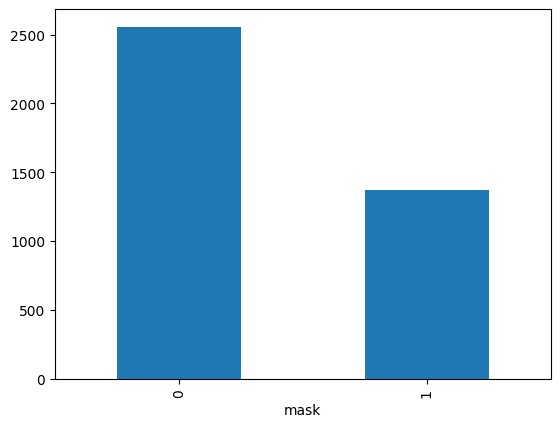

In [10]:
brain_df['mask'].value_counts().plot(kind='bar')

In [11]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [12]:
brain_df['mask'].value_counts().index

Index([0, 1], dtype='int64', name='mask')

In [13]:
# ahora vamos a hacer ploty para hacer un diagrama de barras interactivo
import plotly.express as px
fig = px.bar(x=brain_df['mask'].value_counts().index, y=brain_df['mask'].value_counts())
fig.show()


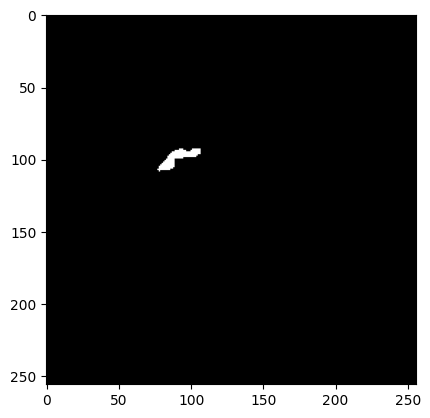

In [14]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

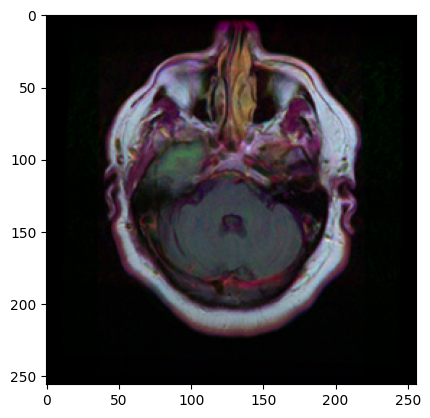

In [15]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

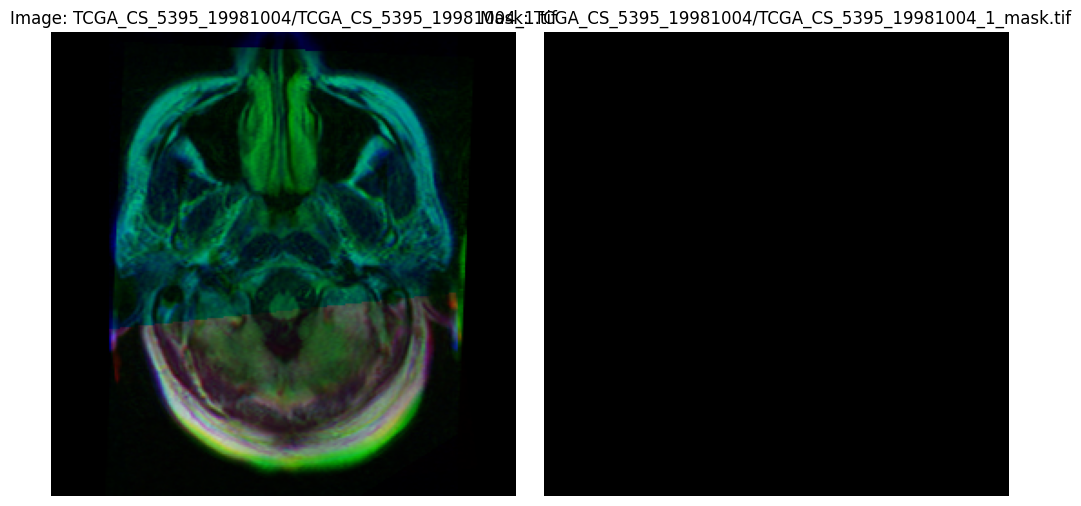

In [16]:
# vamos a generar la comparacion de las imagenes con datos biometricos

# Display a sample image and its mask
sample_index = 0
image_path = brain_df.loc[sample_index, 'image_path']
mask_path = brain_df.loc[sample_index, 'mask_path']

image = cv2.imread(image_path)
mask = cv2.imread(mask_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f'Image: {image_path}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title(f'Mask: {mask_path}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Task
Display 12 random images with tumor detection highlighted in red from the dataset provided in the file "data/lung_image_masks.csv".

## Filter data

### Subtask:
Create a new DataFrame containing only the rows with masks (mask value is 1).


**Reasoning**:
Filter the dataframe to keep only rows where the 'mask' column is 1, and store the result in a new dataframe.



In [17]:
masked_patients_df = brain_df[brain_df['mask'] == 1]
display(masked_patients_df)

,patient_id,image_path,mask_path,mask
445,TCGA_DU_5872_19950223,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_...,1
507,TCGA_DU_5874_19950510,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5.tif,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5_...,1
551,TCGA_DU_5854_19951104,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6_...,1
555,TCGA_DU_5854_19951104,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6_...,1
617,TCGA_DU_5853_19950823,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6.tif,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6_...,1
...,...,...,...,...
3785,TCGA_HT_7684_19950816,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...,1
3795,TCGA_HT_7684_19950816,TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...,TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...,1
3797,TCGA_HT_7684_19950816,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...,1
3806,TCGA_HT_7684_19950816,TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...,TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...,1


## Select random images

### Subtask:
Select 12 random image and mask pairs from the filtered DataFrame.


**Reasoning**:
Randomly sample 12 rows from the filtered DataFrame and extract the image and mask paths.



In [18]:
sampled_masks = masked_patients_df.sample(n=12, random_state=42)
sample_images = sampled_masks['image_path']
sample_masks = sampled_masks['mask_path']
display(sampled_masks)

,patient_id,image_path,mask_path,mask
1859,TCGA_FG_5962_20000626,TCGA_DU_8168_19970503/TCGA_DU_8168_19970503_17...,TCGA_DU_8168_19970503/TCGA_DU_8168_19970503_17...,1
2148,TCGA_FG_6691_20020405,TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_20...,TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_20...,1
1618,TCGA_DU_A5TP_19970614,TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_15...,TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_15...,1
1392,TCGA_DU_8162_19961029,TCGA_HT_7856_19950831/TCGA_HT_7856_19950831_13...,TCGA_HT_7856_19950831/TCGA_HT_7856_19950831_13...,1
1514,TCGA_DU_7306_19930512,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_14...,TCGA_HT_7879_19981009/TCGA_HT_7879_19981009_14...,1
2151,TCGA_FG_6691_20020405,TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_20...,TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_20...,1
1081,TCGA_DU_7014_19860618,TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_10...,TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_10...,1
2353,TCGA_FG_8189_20030516,TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_22...,TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_22...,1
1826,TCGA_DU_A5TY_19970709,TCGA_HT_7473_19970826/TCGA_HT_7473_19970826_17...,TCGA_HT_7473_19970826/TCGA_HT_7473_19970826_17...,1
944,TCGA_DU_6405_19851005,TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_9.tif,TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_9_...,1


## Define a function to display images with masks

### Subtask:
Create a function that takes an image path and mask path, loads the images, highlights the tumor area on the original image using the mask, and displays the resulting image.


**Reasoning**:
Define the function to highlight the tumor area on the image using the mask and display the resulting image.



In [19]:
def highlight_tumor(image_path, mask_path):
    """
    Loads an image and its mask, highlights the tumor area, and displays the result.

    Args:
        image_path (str): Path to the original image.
        mask_path (str): Path to the mask image.
    """
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale

    # Ensure mask is binary (0 or 255)
    _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # Create a red overlay
    red_overlay = np.zeros_like(image, dtype=np.uint8)
    red_overlay[:, :, 2] = 255  # Set red channel to 255

    # Apply the binary mask to the red overlay
    red_masked_overlay = cv2.bitwise_and(red_overlay, red_overlay, mask=binary_mask)

    # Blend the original image and the red masked overlay
    alpha = 0.5  # Transparency factor
    highlighted_image = cv2.addWeighted(image, 1 - alpha, red_masked_overlay, alpha, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
    plt.title(f'Highlighted Tumor: {image_path}')
    plt.axis('off')
    plt.show()

**Reasoning**:
The function to highlight the tumor is defined. Now, apply this function to the sampled images and masks to display the results.



In [20]:
for i in range(len(sampled_masks)):
    image_path = sampled_masks.iloc[i]['image_path']
    mask_path = sampled_masks.iloc[i]['mask_path']
    highlight_tumor(image_path, mask_path)

Output hidden; open in https://colab.research.google.com to view.

MINI RETO 3:
Cual es el rendimiento de resnet en el conjunto de datos imagenet.

Explora otras arquitecturas de rnc como alexnet y enumera su rendimiento en comparacion con resnet(se requiere investigacion externa)

AlexNet:

Año de Introducción: 2012
Características Clave: Fue una arquitectura pionera que demostró el poder de las redes neuronales convolucionales profundas y el uso de GPUs para el entrenamiento. Utilizó funciones de activación ReLU y dropout para regularización.
Rendimiento en ImageNet (ILSVRC 2012): Logró una tasa de error top-5 del 15.3%. Esto fue un avance significativo en ese momento.
ResNet (Residual Network):

Año de Introducción: 2015
Características Clave: Introdujo las 'conexiones residuales' (skip connections) que permiten que la red salte una o más capas. Esto resuelve el problema del 'vanishing gradient' y permite construir redes mucho más profundas sin que el rendimiento se degrade.
Rendimiento en ImageNet (ILSVRC 2015): Varias versiones de ResNet mostraron un rendimiento sobresaliente. Por ejemplo, ResNet-152 alcanzó una tasa de error top-5 de 3.57%. Las versiones más recientes y optimizadas pueden lograr incluso mejores resultados.
Comparación: ResNet representó un salto cualitativo enorme en el rendimiento de las CNN en comparación con AlexNet y otras arquitecturas anteriores. Mientras que AlexNet sentó las bases para el aprendizaje profundo en visión por computadora, las innovaciones de ResNet permitieron el entrenamiento de modelos mucho más profundos y, por lo tanto, significativamente más precisos. La tasa de error top-5 de ResNet es aproximadamente cuatro veces menor que la de AlexNet, lo que demuestra la eficacia de las conexiones residuales para entrenar modelos extremadamente profundos

In [37]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 1. Cargar modelos pre-entrenados
print("Cargando AlexNet pre-entrenado...")
alexnet = models.alexnet(pretrained=True)
alexnet.eval() # Poner el modelo en modo de evaluacion
print("AlexNet cargado.\n")

print("Cargando ResNet-50 pre-entrenado...")
resnet50 = models.resnet50(pretrained=True)
resnet50.eval() # Poner el modelo en modo de evaluacion
print("ResNet-50 cargado.\n")

# 2. Definir transformaciones de preprocesamiento de imagen
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


try:

    sample_image_path = '/content/drive/My Drive/MRI/Brain_MRI/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif' # Usando una imagen del dataset anterior
    image = Image.open(sample_image_path).convert('RGB')
    print(f"Imagen cargada desde: {sample_image_path}\n")
except FileNotFoundError:
    print("No se encontró la imagen de ejemplo. Creando una imagen sintética para demostración.\n")
    # Crear una imagen aleatoria de 224x224 si no se encuentra la ruta
    image = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))

# 4. Preprocesar la imagen
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0) # Crear un mini-batch de una sola imagen

# Mover el input al GPU si está disponible
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    alexnet.to('cuda')
    resnet50.to('cuda')

# 5. Realizar inferencia con AlexNet
print("Realizando inferencia con AlexNet...")
with torch.no_grad():
    output_alexnet = alexnet(input_batch)

# Obtener las probabilidades y la clase predicha para AlexNet
probabilities_alexnet = torch.nn.functional.softmax(output_alexnet[0], dim=0)
# Nota: para obtener el nombre de la clase, necesitarías un archivo de mapeo de índices a nombres.
# Aquí, solo mostramos el índice de la clase más probable.
global predicted_class_alexnet_idx, predicted_prob_alexnet
predicted_class_alexnet_idx = torch.argmax(probabilities_alexnet).item()
predicted_prob_alexnet = probabilities_alexnet[predicted_class_alexnet_idx].item()
print(f"Predicción de AlexNet (índice de clase más probable): {predicted_class_alexnet_idx}")
print(f"Probabilidad de la clase predicha por AlexNet: {predicted_prob_alexnet:.4f}\n")

# 6. Realizar inferencia con ResNet-50
print("Realizando inferencia con ResNet-50...")
with torch.no_grad():
    output_resnet50 = resnet50(input_batch)

# Obtener las probabilidades y la clase predicha para ResNet-50
probabilities_resnet50 = torch.nn.functional.softmax(output_resnet50[0], dim=0)
global predicted_class_resnet50_idx, predicted_prob_resnet50
predicted_class_resnet50_idx = torch.argmax(probabilities_resnet50).item()
predicted_prob_resnet50 = probabilities_resnet50[predicted_class_resnet50_idx].item()
print(f"Predicción de ResNet-50 (índice de clase más probable): {predicted_class_resnet50_idx}")
print(f"Probabilidad de la clase predicha por ResNet-50: {predicted_prob_resnet50:.4f}\n")

print("Demostración completada. Puedes interpretar las salidas como la clase más probable que cada modelo predice para la imagen de entrada.")

Cargando AlexNet pre-entrenado...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.



AlexNet cargado.

Cargando ResNet-50 pre-entrenado...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.



ResNet-50 cargado.

Imagen cargada desde: /content/drive/My Drive/MRI/Brain_MRI/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif

Realizando inferencia con AlexNet...
Predicción de AlexNet (índice de clase más probable): 971
Probabilidad de la clase predicha por AlexNet: 0.7947

Realizando inferencia con ResNet-50...
Predicción de ResNet-50 (índice de clase más probable): 711
Probabilidad de la clase predicha por ResNet-50: 0.1571

Demostración completada. Puedes interpretar las salidas como la clase más probable que cada modelo predice para la imagen de entrada.


### Two More Highlighted Tumor Images

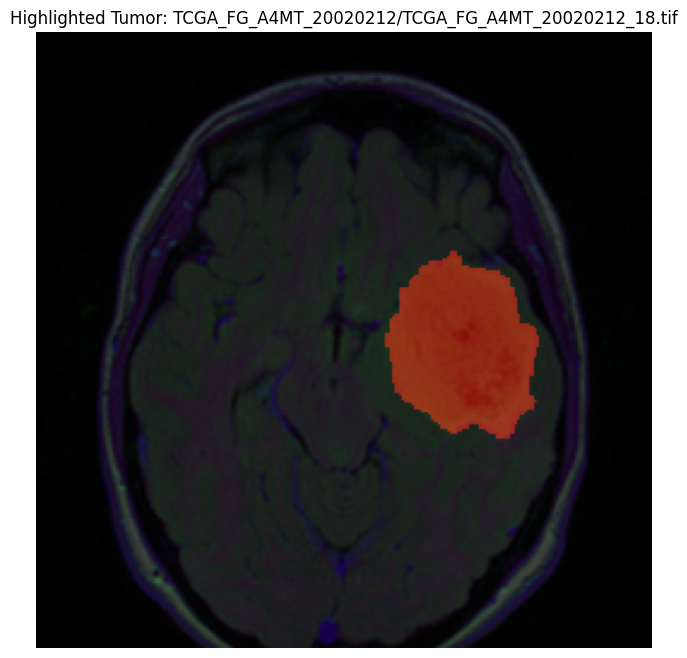

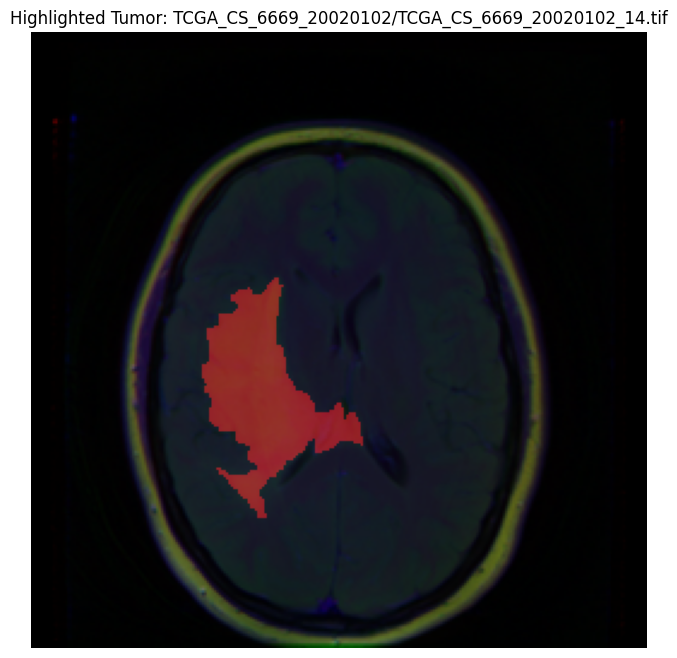

In [39]:
# Sample two more random images with masks
new_sampled_masks = masked_patients_df.sample(n=2, random_state=random.randint(0, 1000))

for i in range(len(new_sampled_masks)):
    image_path = new_sampled_masks.iloc[i]['image_path']
    mask_path = new_sampled_masks.iloc[i]['mask_path']
    highlight_tumor(image_path, mask_path)

Entender la Teoria y aplicarlo con aprendizaje por trasnferencia

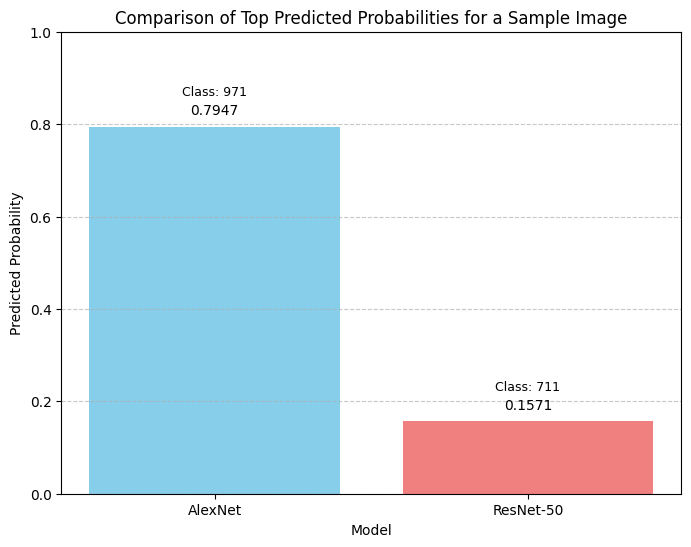

In [38]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['AlexNet', 'ResNet-50']
predicted_probs = [predicted_prob_alexnet, predicted_prob_resnet50]
predicted_classes_indices = [predicted_class_alexnet_idx, predicted_class_resnet50_idx]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, predicted_probs, color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Predicted Probability')
plt.title('Comparison of Top Predicted Probabilities for a Sample Image')
plt.ylim(0, 1) # Probabilities are between 0 and 1

# Add probability values and class indices on top of the bars
for i, prob in enumerate(predicted_probs):
    plt.text(i, prob + 0.02, f'{prob:.4f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, prob + 0.06, f'Class: {predicted_classes_indices[i]}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Comparación de 12 imágenes aleatorias del dataset con sus máscaras

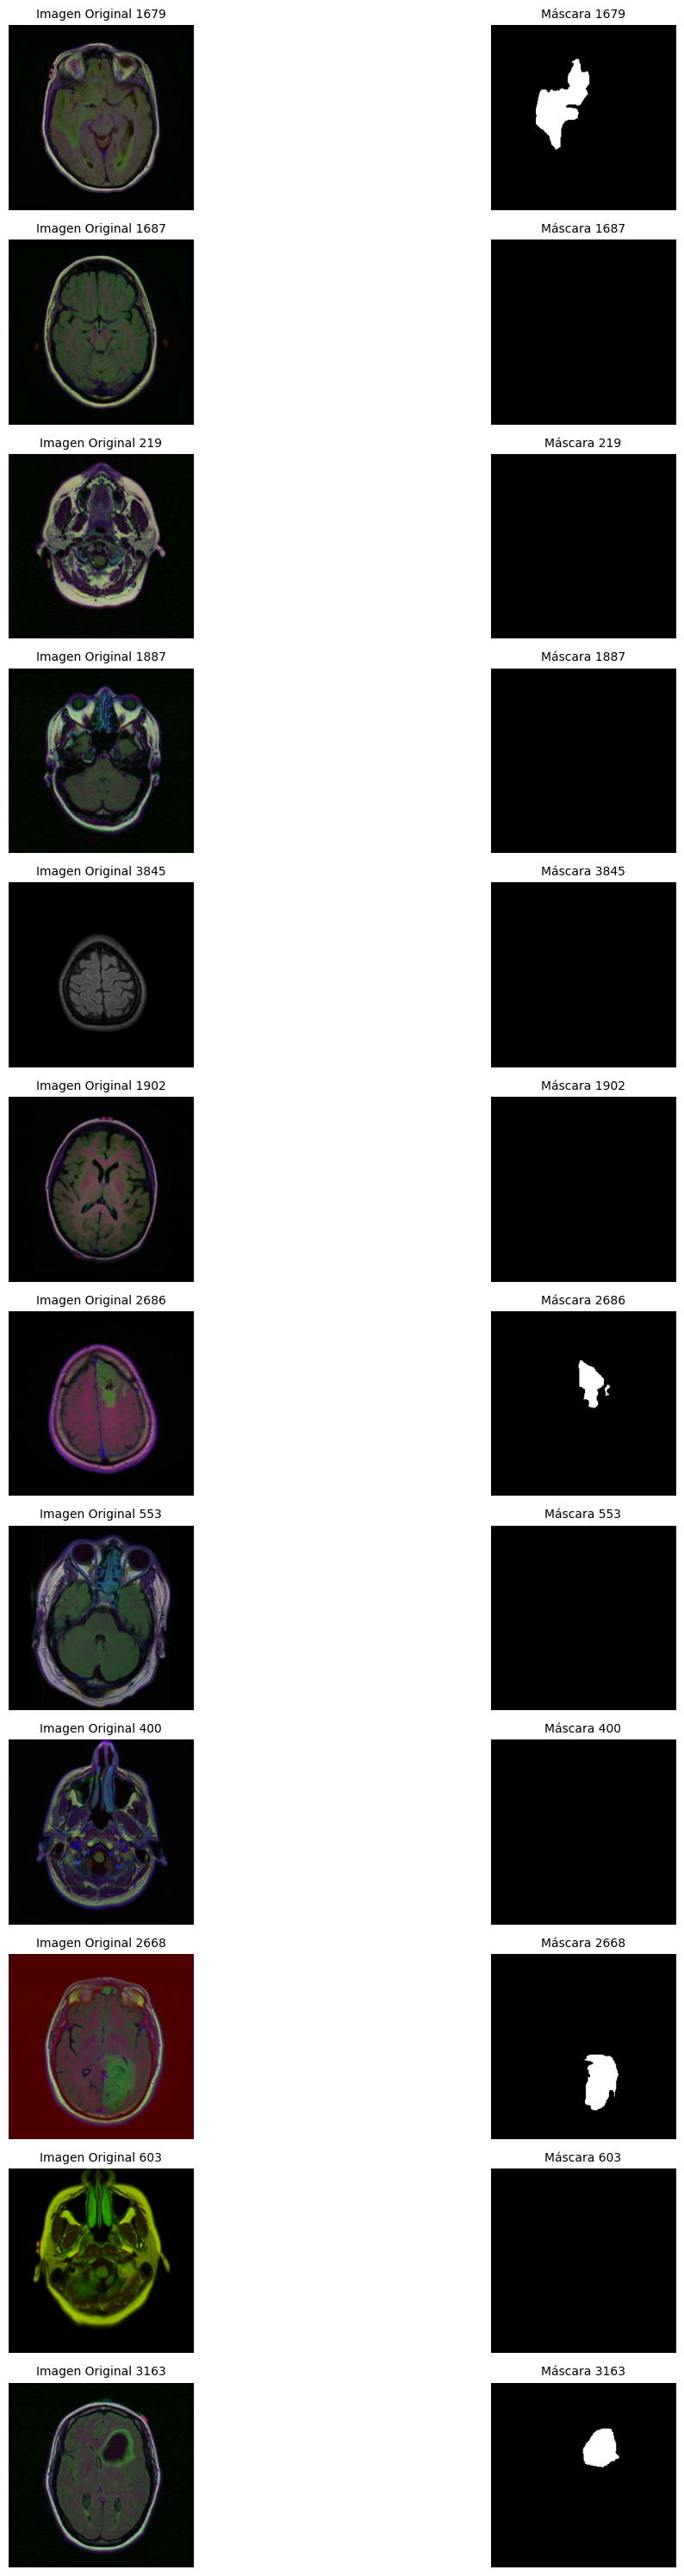

In [22]:
import matplotlib.pyplot as plt
import cv2
import random

# Sample 12 random indices from the DataFrame
random_indices = random.sample(range(len(brain_df)), 12)

plt.figure(figsize=(15, 30)) # Adjust figure size for better viewing

for i, idx in enumerate(random_indices):
    image_path = brain_df.loc[idx, 'image_path']
    mask_path = brain_df.loc[idx, 'mask_path']

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path)

    # Display original image
    plt.subplot(12, 2, 2*i + 1) # 12 rows, 2 columns, odd positions
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen Original {idx}', fontsize=10)
    plt.axis('off')

    # Display mask
    plt.subplot(12, 2, 2*i + 2) # 12 rows, 2 columns, even positions
    plt.imshow(mask)
    plt.title(f'Máscara {idx}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Tumor Images Highlighted

In [23]:
# Usando las imagenes con alex-net en 12 imagenes del DataSet
for i in range(len(sampled_masks)):
    image_path = sampled_masks.iloc[i]['image_path']
    mask_path = sampled_masks.iloc[i]['mask_path']
    highlight_tumor(image_path, mask_path)

Output hidden; open in https://colab.research.google.com to view.

### Imagen utilizada para la Inferencia con AlexNet

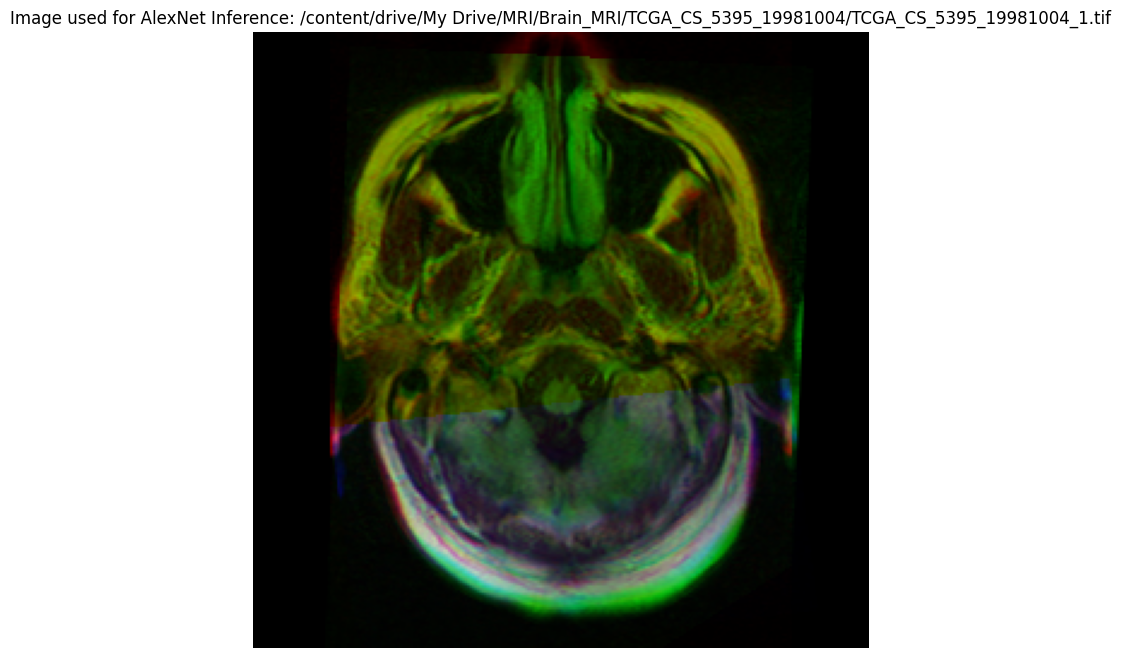

In [24]:
import matplotlib.pyplot as plt
import cv2

if 'sample_image_path' not in locals() or sample_image_path is None:
    sample_image_path = '/content/drive/My Drive/MRI/Brain_MRI/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif'

image_alexnet = cv2.imread(sample_image_path)
if image_alexnet is not None:
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image_alexnet, cv2.COLOR_BGR2RGB))
    plt.title(f'Image used for AlexNet Inference: {sample_image_path}')
    plt.axis('off')
    plt.show()
else:
    print(f"Could not load image from: {sample_image_path}")

### Inferencia con AlexNet

Aquí demostraremos la inferencia de una imagen utilizando el modelo pre-entrenado AlexNet.

In [25]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 1. Cargar el modelo AlexNet pre-entrenado
print("Cargando AlexNet pre-entrenado...")
alexnet = models.alexnet(pretrained=True)
alexnet.eval() # Poner el modelo en modo de evaluación
print("AlexNet cargado.\n")

# 2. Definir transformaciones de preprocesamiento de imagen
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 3. Cargar una imagen de ejemplo (usando la misma ruta que antes)
try:
    sample_image_path = '/content/drive/My Drive/MRI/Brain_MRI/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif'
    image = Image.open(sample_image_path).convert('RGB')
    print(f"Imagen cargada desde: {sample_image_path}\n")
except FileNotFoundError:
    print("No se encontró la imagen de ejemplo. Creando una imagen sintética para demostración.\n")
    image = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))

# 4. Preprocesar la imagen
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0) # Crear un mini-batch de una sola imagen

# Mover el input al GPU si está disponible
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    alexnet.to('cuda')

# 5. Realizar inferencia con AlexNet
print("Realizando inferencia con AlexNet...")
with torch.no_grad():
    output_alexnet = alexnet(input_batch)

# Obtener las probabilidades y la clase predicha para AlexNet
probabilities_alexnet = torch.nn.functional.softmax(output_alexnet[0], dim=0)
predicted_class_alexnet = torch.argmax(probabilities_alexnet).item()
print(f"Predicción de AlexNet (índice de clase más probable): {predicted_class_alexnet}")
print(f"Probabilidad de la clase predicha por AlexNet: {probabilities_alexnet[predicted_class_alexnet].item():.4f}\n")

print("Inferencia con AlexNet completada.")

Cargando AlexNet pre-entrenado...
AlexNet cargado.

Imagen cargada desde: /content/drive/My Drive/MRI/Brain_MRI/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif

Realizando inferencia con AlexNet...
Predicción de AlexNet (índice de clase más probable): 971
Probabilidad de la clase predicha por AlexNet: 0.7947

Inferencia con AlexNet completada.


MINI RETO #4

Enumere los desafios del aprendizaje por transferencias (Requiere investigacion externa)


Tarea 6 Entrenar un modelo clasficador para detectar si existe un tumor o no

In [26]:
# Elegimos la columna de indentificador del paciente
brain_df_train = brain_df.drop(columns = ["patient_id"])
brain_df_train.shape

(3929, 3)

In [27]:
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))


In [28]:
brain_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [29]:
# Vamos a dividir los datos de entrenamiento y el testing
from sklearn.model_selection import train_test_split
train, test = train_test_split(brain_df_train, test_size=0.2, random_state=42)

In [30]:

%pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [31]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.15)

In [32]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    x_col='image_path',
    y_col='mask',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='mask',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 2672 validated image filenames belonging to 2 classes.
Found 117 validated image filenames belonging to 2 classes.


### Visualización de un Batch de Imágenes y sus Etiquetas Binarias del Generador

Forma de las imágenes en el batch: (32, 256, 256, 3)
Forma de las etiquetas en el batch: (32,)
Ejemplo de etiquetas en el batch: [1. 0. 1. 0. 1.]


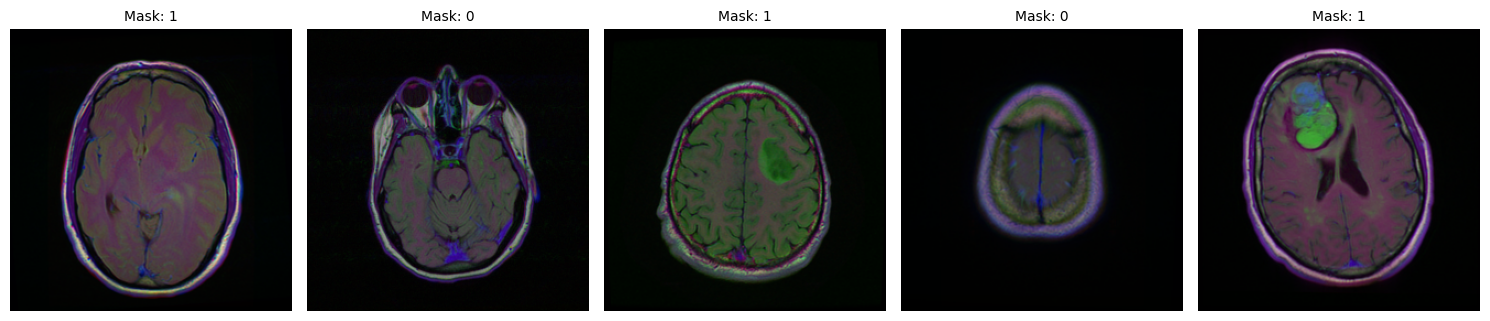

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener un batch de datos del generador de entrenamiento
images, labels = next(train_generator)

print(f"Forma de las imágenes en el batch: {images.shape}")
print(f"Forma de las etiquetas en el batch: {labels.shape}")
print(f"Ejemplo de etiquetas en el batch: {labels[:5]}") # Mostrar las primeras 5 etiquetas

# Visualizar algunas imágenes y sus etiquetas
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes = axes.flatten()

for img, label, ax in zip(images, labels, axes):
    ax.imshow(img) # Las imágenes ya están escaladas a 0-1 por ImageDataGenerator
    ax.set_title(f'Mask: {int(label)}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [34]:
# obtenemos el modelo base de ResNet50
# Rathole
basemodel = ResNet50(weights='imagenet', include_top=False, input_tensor = Input(shape=(256, 256, 3)))

#

basemodel.summary()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [35]:
# Tarea: realizar lo mismo pero ahora con alexnet


In [36]:
# Examen para el lunes
# realizar lo mismo para cancer de piel
# cargar la imagen y el modelo tiene que identificar si tienes cancer o no
